# Analisis Sentimen Pada Ulasan Pengguna Aplikasi Wondr By BNI Menggunakan Metode Multinomial Naive Bayes

##1. Pengumpulan Data

In [ ]:
!pip install google-play-scraper

In [ ]:
from google_play_scraper import Sort, reviews

result, continuation_token = reviews(
    'id.bni.wondr',
    lang = 'id',
    country = 'id',
    sort=Sort.MOST_RELEVANT,
    count=5000,
    filter_score_with=None
)

In [ ]:
import pandas as pd
import numpy as np

df_ulasan = pd.DataFrame(np.array(result),columns=['review'])

df_ulasan = df_ulasan.join(pd.DataFrame(df_ulasan.pop('review').tolist()))

df_ulasan.head(5)

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,69e05750-befd-4b3c-a20d-7a4cf9204c92,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"tidak lebih baik dari versi sebelumnya. ""BNI m...",1,13,1.3.2,2025-06-17 01:10:41,"Hai Kak Yelfia, mohon maaf atas kendalanya ya ...",2025-06-17 01:44:16,1.3.2
1,01f0dce0-3b72-4fed-945c-b4a1151ee451,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Aplikasinya sih sudah bagus bgt. Tapi untuk mo...,3,8,1.3.2,2025-06-19 14:03:10,"Hai Kak Maya Sari, maaf atas ketidaknyamananny...",2025-06-19 14:25:33,1.3.2
2,62a966eb-b0fd-4f3d-b441-09089366248e,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"Tolong di perbaiki masalah login nya, pas awal...",1,11,1.3.2,2025-06-17 04:07:56,"Hai Kak Mirakam Iqfir, maaf untuk kendalanya. ...",2025-06-17 05:40:54,1.3.2
3,1992aca9-0f83-4b1a-b79a-009baf94c594,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,aplikasi tolol mau daftar aja susah. edit: sus...,1,5,1.3.2,2025-06-16 04:47:27,"Hai Kak Anak Magang, maaf atas ketidaknyamanan...",2025-06-16 07:50:15,1.3.2
4,addf5ab5-fc43-4c69-a971-dd7349e018b7,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"bagus aplikasi lama lagi, lebih cepat log in n...",1,47,1.3.2,2025-06-04 01:34:23,"Hai Kak Sonny Akhmad Perdana, maaf atas kendal...",2025-06-04 01:45:24,1.3.2


In [ ]:
len(df_ulasan.index)

5000

In [ ]:
df_ulasan[['userName', 'score', 'at', 'content']].head(5)

,userName,score,at,content
0,Pengguna Google,1,2025-06-17 01:10:41,"tidak lebih baik dari versi sebelumnya. ""BNI m..."
1,Pengguna Google,3,2025-06-19 14:03:10,Aplikasinya sih sudah bagus bgt. Tapi untuk mo...
2,Pengguna Google,1,2025-06-17 04:07:56,"Tolong di perbaiki masalah login nya, pas awal..."
3,Pengguna Google,1,2025-06-16 04:47:27,aplikasi tolol mau daftar aja susah. edit: sus...
4,Pengguna Google,1,2025-06-04 01:34:23,"bagus aplikasi lama lagi, lebih cepat log in n..."


In [ ]:
new_df = df_ulasan[['userName', 'score', 'at', 'content']]

sorted_df = new_df.sort_values(by='at', ascending=False)

sorted_df.head(5)

,userName,score,at,content
811,Pengguna Google,1,2025-06-24 21:11:40,verifikasi akun google kenapa ga muncul sih ot...
2777,Pengguna Google,1,2025-06-24 17:12:08,saldo minimal berapa tolol kemaren bisa minima...
2304,Pengguna Google,5,2025-06-24 16:13:14,bagus aplikasiy cepet transaksi y
949,Pengguna Google,3,2025-06-24 15:20:23,Ribet ambil tunai tanpa kartu aja harus ada ot...
1951,Pengguna Google,5,2025-06-24 15:10:44,cepat dan simple


In [ ]:
my_df = sorted_df[['userName', 'score', 'at', 'content']]

my_df = my_df[['content', 'score']]

my_df.head(5)

,content,score
811,verifikasi akun google kenapa ga muncul sih ot...,1
2777,saldo minimal berapa tolol kemaren bisa minima...,1
2304,bagus aplikasiy cepet transaksi y,5
949,Ribet ambil tunai tanpa kartu aja harus ada ot...,3
1951,cepat dan simple,5


In [ ]:
my_df.to_csv('scrapped_data_WondrByBNI.csv', index = False)

##2. Preprocessing Data

In [ ]:
df = pd.read_csv('scrapped_data_WondrByBNI.csv')

df.head(5)

,content,score
0,verifikasi akun google kenapa ga muncul sih ot...,1
1,saldo minimal berapa tolol kemaren bisa minima...,1
2,bagus aplikasiy cepet transaksi y,5
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3
4,cepat dan simple,5


##2.1. Cleaning Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  5000 non-null   object
 1   score    5000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 78.3+ KB


In [ ]:
df.drop_duplicates(subset = 'content', keep = 'first', inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4991 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  4991 non-null   object
 1   score    4991 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 117.0+ KB


In [ ]:
import re

def remove_emoji(text):
    if text is not None and isinstance(text, str):
        emoji_pattern = re.compile("["
            u"\U0001F600-\U0001F64F"
            u"\U0001F300-\U0001F5FF"
            u"\U0001F680-\U0001F6FF"
            u"\U0001F1E0-\U0001F1FF"
            u"\U0001F004-\U0001F0CF"
            "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', text)
    return text

def clean_text(text):
    return re.sub(r'[^a-zA-Z\s]', '', text)

def remove_extra_spaces(text):
    return re.sub(r'\s+', ' ', text).strip()

df['cleaning'] = df['content'].apply(remove_emoji)
df['cleaning'] = df['cleaning'].apply(clean_text)
df['cleaning'] = df['cleaning'].apply(remove_extra_spaces)

df.head(5)

,content,score,cleaning
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...
4,cepat dan simple,5,cepat dan simple


##2.2. Case Folding

In [ ]:
def case_folding(text):
  if isinstance(text, str):
    lowercase_text = text.lower()
    return lowercase_text
  else:
    return text

df['case_folding'] = df['cleaning'].apply(case_folding)

df.head(5)

,content,score,cleaning,case_folding
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa ga muncul sih ot...
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemaren bisa minima...
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepet transaksi y
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu aja harus ada ot...
4,cepat dan simple,5,cepat dan simple,cepat dan simple


##2.3. Normalize

In [ ]:
def replace_taboo_words(text, kamus_tidak_baku):
    if isinstance(text, str):
        words = text.split()
        replaced_words = []
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

        for word in words:
            if word in kamus_tidak_baku:
                baku_word = kamus_tidak_baku[word]
                if isinstance(baku_word, str) and all(char.isalpha() for char in baku_word):
                    replaced_words.append(baku_word)
                    kalimat_baku.append(baku_word)
                    kata_diganti.append(word)
                    kata_tidak_baku_hash.append(hash(word))
            else:
                replaced_words.append(word)
        replaced_text = ' '.join(replaced_words)
    else:
        replaced_text = ''
        kalimat_baku = []
        kata_diganti = []
        kata_tidak_baku_hash = []

    return replaced_text, kalimat_baku, kata_diganti, kata_tidak_baku_hash

In [ ]:
data =  pd.DataFrame(df[['content', 'score', 'cleaning', 'case_folding']])

kamus_data = pd.read_csv('/content/kamuskatabaku.csv')
kamus_tidak_baku = dict(zip(kamus_data['tidak_baku'], kamus_data['kata_baku']))

In [ ]:
data['normalize'], data['Kata_Baku'], data['Kata_Tidak_Baku'], data['Kata_Tidak_Baku_Hash'] = zip(*data['case_folding'].apply(lambda x: replace_taboo_words(x, kamus_tidak_baku)))

df =  pd.DataFrame(data[['content', 'score', 'cleaning', 'case_folding', 'normalize']])

df.head(5)

,content,score,cleaning,case_folding,normalize
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa tidak muncul sih...
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemarin bisa minima...
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepat transaksi ya
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu saja harus ada o...
4,cepat dan simple,5,cepat dan simple,cepat dan simple,cepat dan simple


##2.4. Tokenize

In [ ]:
def tokenize(text):
  if isinstance(text, str):
    return text.split()
  else:
    return []

df['tokenize'] = df['normalize'].apply(tokenize)

df.head(5)

,content,score,cleaning,case_folding,normalize,tokenize
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa tidak muncul sih...,"[verifikasi, akun, google, kenapa, tidak, munc..."
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemarin bisa minima...,"[saldo, minimal, berapa, tolol, kemarin, bisa,..."
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepat transaksi ya,"[bagus, aplikasiy, cepat, transaksi, ya]"
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu saja harus ada o...,"[ribet, ambil, tunai, tanpa, kartu, saja, haru..."
4,cepat dan simple,5,cepat dan simple,cepat dan simple,cepat dan simple,"[cepat, dan, simple]"


##2.5. Stopwords Removal

In [ ]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')

stopwords = stopwords.words('indonesian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
def remove_stopwords(text):
    return[word for word in text if word not in stopwords]

df['stopwords_removal'] = df['tokenize'].apply(lambda x: (remove_stopwords(x)))

df.head(5)

,content,score,cleaning,case_folding,normalize,tokenize,stopwords_removal
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa tidak muncul sih...,"[verifikasi, akun, google, kenapa, tidak, munc...","[verifikasi, akun, google, muncul, sih, otpnya]"
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemarin bisa minima...,"[saldo, minimal, berapa, tolol, kemarin, bisa,...","[saldo, minimal, tolol, kemarin, minimal, mini..."
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepat transaksi ya,"[bagus, aplikasiy, cepat, transaksi, ya]","[bagus, aplikasiy, cepat, transaksi, ya]"
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu saja harus ada o...,"[ribet, ambil, tunai, tanpa, kartu, saja, haru...","[ribet, ambil, tunai, kartu, otp, sms, kadang,..."
4,cepat dan simple,5,cepat dan simple,cepat dan simple,cepat dan simple,"[cepat, dan, simple]","[cepat, simple]"


##2.6. Stemming

In [ ]:
!pip install Sastrawi

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

factory = StemmerFactory()

stemmer = factory.create_stemmer()

def stem_text(text):
    return [stemmer.stem(word) for word in text]

df['stemming'] = df['stopwords_removal'].apply(lambda x: ' '.join(stem_text(x)))

df.head(5)

,content,score,cleaning,case_folding,normalize,tokenize,stopwords_removal,stemming
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa tidak muncul sih...,"[verifikasi, akun, google, kenapa, tidak, munc...","[verifikasi, akun, google, muncul, sih, otpnya]",verifikasi akun google muncul sih otpnya
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemarin bisa minima...,"[saldo, minimal, berapa, tolol, kemarin, bisa,...","[saldo, minimal, tolol, kemarin, minimal, mini...",saldo minimal tolol kemarin minimal minimal ka...
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepat transaksi ya,"[bagus, aplikasiy, cepat, transaksi, ya]","[bagus, aplikasiy, cepat, transaksi, ya]",bagus aplikasiy cepat transaksi ya
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu saja harus ada o...,"[ribet, ambil, tunai, tanpa, kartu, saja, haru...","[ribet, ambil, tunai, kartu, otp, sms, kadang,...",ribet ambil tunai kartu otp sms kadang indak m...
4,cepat dan simple,5,cepat dan simple,cepat dan simple,cepat dan simple,"[cepat, dan, simple]","[cepat, simple]",cepat simple


In [ ]:
df.to_csv('preprocessed_data_WondrByBNI.csv', index=False)

##3. Pelabelan Data

In [ ]:
df = pd.read_csv('preprocessed_data_WondrByBNI.csv')

In [ ]:
def label_sentimen(score):
  if score < 3:
    return 'negatif'
  elif score >= 3:
    return 'positif'

df['label'] = df['score'].apply(label_sentimen)

df.head(5)

,content,score,cleaning,case_folding,normalize,tokenize,stopwords_removal,stemming,label
0,verifikasi akun google kenapa ga muncul sih ot...,1,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa ga muncul sih ot...,verifikasi akun google kenapa tidak muncul sih...,"['verifikasi', 'akun', 'google', 'kenapa', 'ti...","['verifikasi', 'akun', 'google', 'muncul', 'si...",verifikasi akun google muncul sih otpnya,negatif
1,saldo minimal berapa tolol kemaren bisa minima...,1,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemaren bisa minima...,saldo minimal berapa tolol kemarin bisa minima...,"['saldo', 'minimal', 'berapa', 'tolol', 'kemar...","['saldo', 'minimal', 'tolol', 'kemarin', 'mini...",saldo minimal tolol kemarin minimal minimal ka...,negatif
2,bagus aplikasiy cepet transaksi y,5,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepet transaksi y,bagus aplikasiy cepat transaksi ya,"['bagus', 'aplikasiy', 'cepat', 'transaksi', '...","['bagus', 'aplikasiy', 'cepat', 'transaksi', '...",bagus aplikasiy cepat transaksi ya,positif
3,Ribet ambil tunai tanpa kartu aja harus ada ot...,3,Ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu aja harus ada ot...,ribet ambil tunai tanpa kartu saja harus ada o...,"['ribet', 'ambil', 'tunai', 'tanpa', 'kartu', ...","['ribet', 'ambil', 'tunai', 'kartu', 'otp', 's...",ribet ambil tunai kartu otp sms kadang indak m...,positif
4,cepat dan simple,5,cepat dan simple,cepat dan simple,cepat dan simple,"['cepat', 'dan', 'simple']","['cepat', 'simple']",cepat simple,positif


In [ ]:
sentimen_counts = df['label'].value_counts()

print("\nJumlah Sentimen Positif dan Negatif:")
print(sentimen_counts)


Jumlah Sentimen Positif dan Negatif:
label
positif    2806
negatif    2185
Name: count, dtype: int64


##4. Pembagian Dataset

In [ ]:
from sklearn.model_selection import train_test_split

X = df['stemming']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = X_train.fillna('')
X_test = X_test.fillna('')

In [ ]:
print("Jumlah data train:", len(X_train))
print("Jumlah data test:", len(X_test))

Jumlah data train: 3992
Jumlah data test: 999


##5. Ekstraksi Fitur

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

##6. Klasifikasi Model

In [ ]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_vec, y_train)
y_pred = model.predict(X_test_vec)

##7. Evaluasi dan Visualisasi Model

In [ ]:
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score

print("=== Hasil Evaluasi Model (Classification Report) ===")
print(classification_report(y_test, y_pred))

=== Hasil Evaluasi Model (Classification Report) ===
              precision    recall  f1-score   support

     negatif       0.80      0.79      0.79       444
     positif       0.83      0.84      0.84       555

    accuracy                           0.82       999
   macro avg       0.82      0.81      0.82       999
weighted avg       0.82      0.82      0.82       999



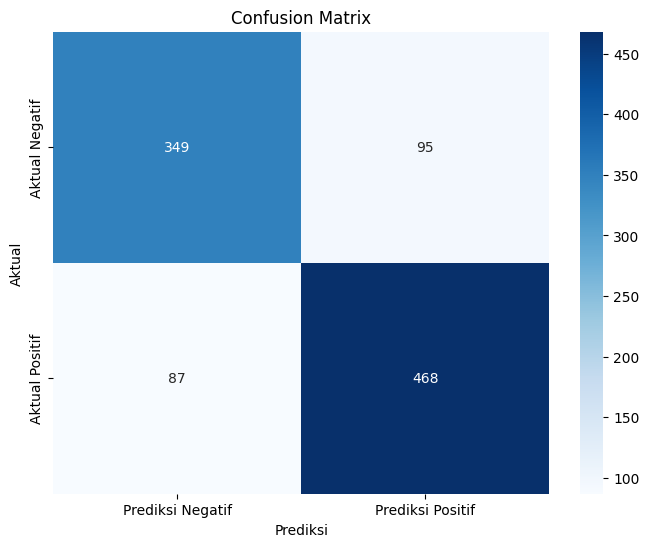

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Prediksi Negatif', 'Prediksi Positif'],
            yticklabels=['Aktual Negatif', 'Aktual Positif'])
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.title('Confusion Matrix')
plt.show()

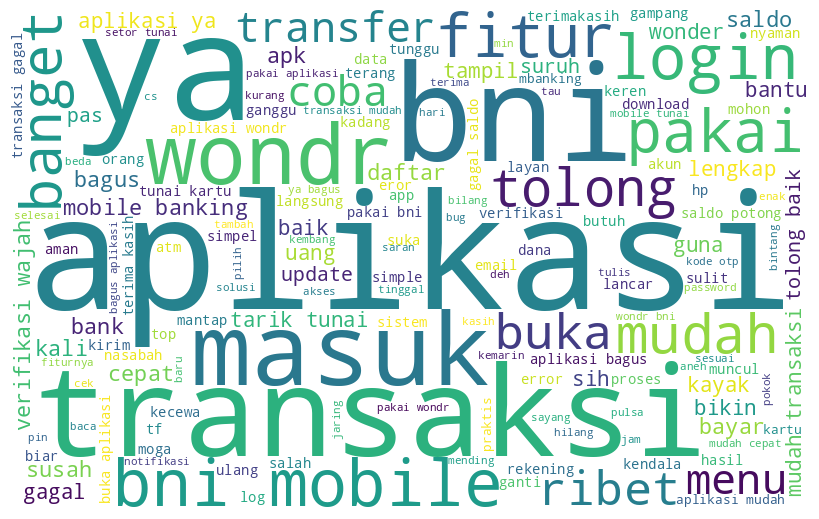

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

text = " ".join(str(review) for review in df.stemming.fillna(""))

wordcloud = WordCloud(width=800, height=500,
                      background_color='white',
                      min_font_size=10).generate(text)

plt.figure(figsize=(8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()

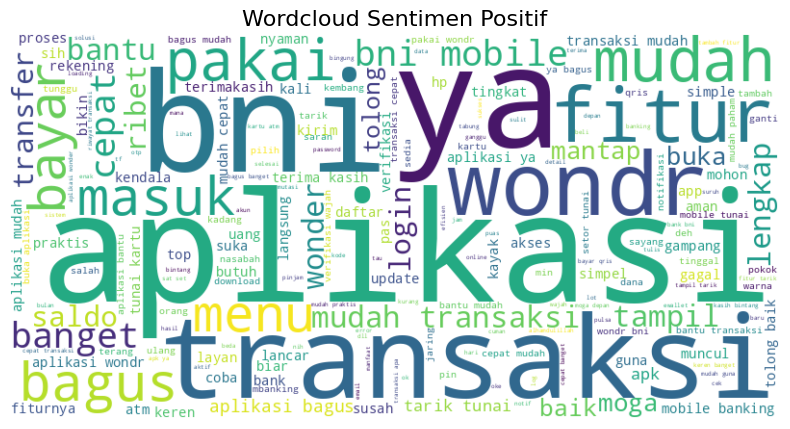

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

positive_reviews = ' '.join(df[df['label'] == 'positif']['stemming'].astype(str))

generate_wordcloud(positive_reviews, 'Wordcloud Sentimen Positif')

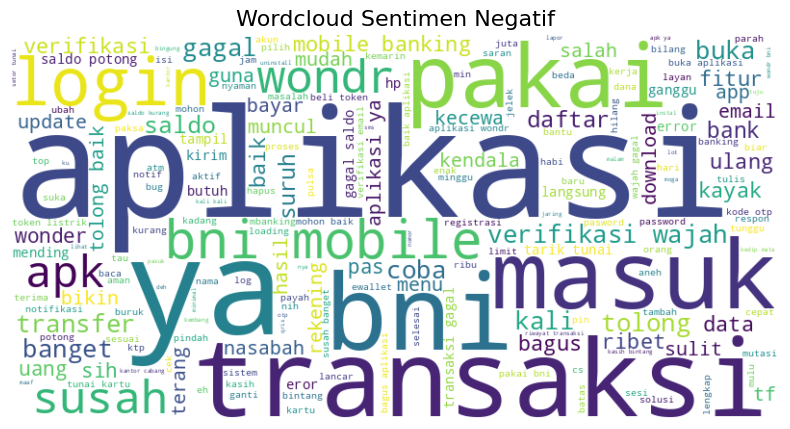

In [ ]:
from wordcloud import WordCloud

import matplotlib.pyplot as plt

def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

negative_reviews = ' '.join(df[df['label'] == 'negatif']['stemming'].astype(str))

generate_wordcloud(negative_reviews, 'Wordcloud Sentimen Negatif')